In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Inspect database
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Get column names
columns1 = inspector.get_columns('measurement')
for c in columns1:
    print(c['name'], c['type'])
    
columns2 = inspector.get_columns('station')
for co in columns2:
    print(co['name'], co['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Create list to sort dates from
date_list = [Measurement.date]
print(date_list)

In [13]:
# Find dates for last 12 months
max_date=session.query(*date_list).order_by(Measurement.date.desc()).all()
max_date

[('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-09'),
 ('2017-08-09'),
 ('2017-08-09'

2016-08-23
SELECT measurement.date AS measurement_date, measurement.prcp AS measurement_prcp 
FROM measurement 
WHERE measurement.date > ? ORDER BY measurement.date
            Percipitation
Date                     
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.22
2016-08-24           2.15
2016-08-24           1.45
2016-08-25           0.08
2016-08-25           0.08
2016-08-25           0.00
            Percipitation
Date                     
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.22
2016-08-24           2.15
2016-08-24           1.45
2016-08-25           0.08
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.11
2016-08-26           0.00
2016-08-26           0.03
2016-08-26           0.02
2016-08-26           0.04
201

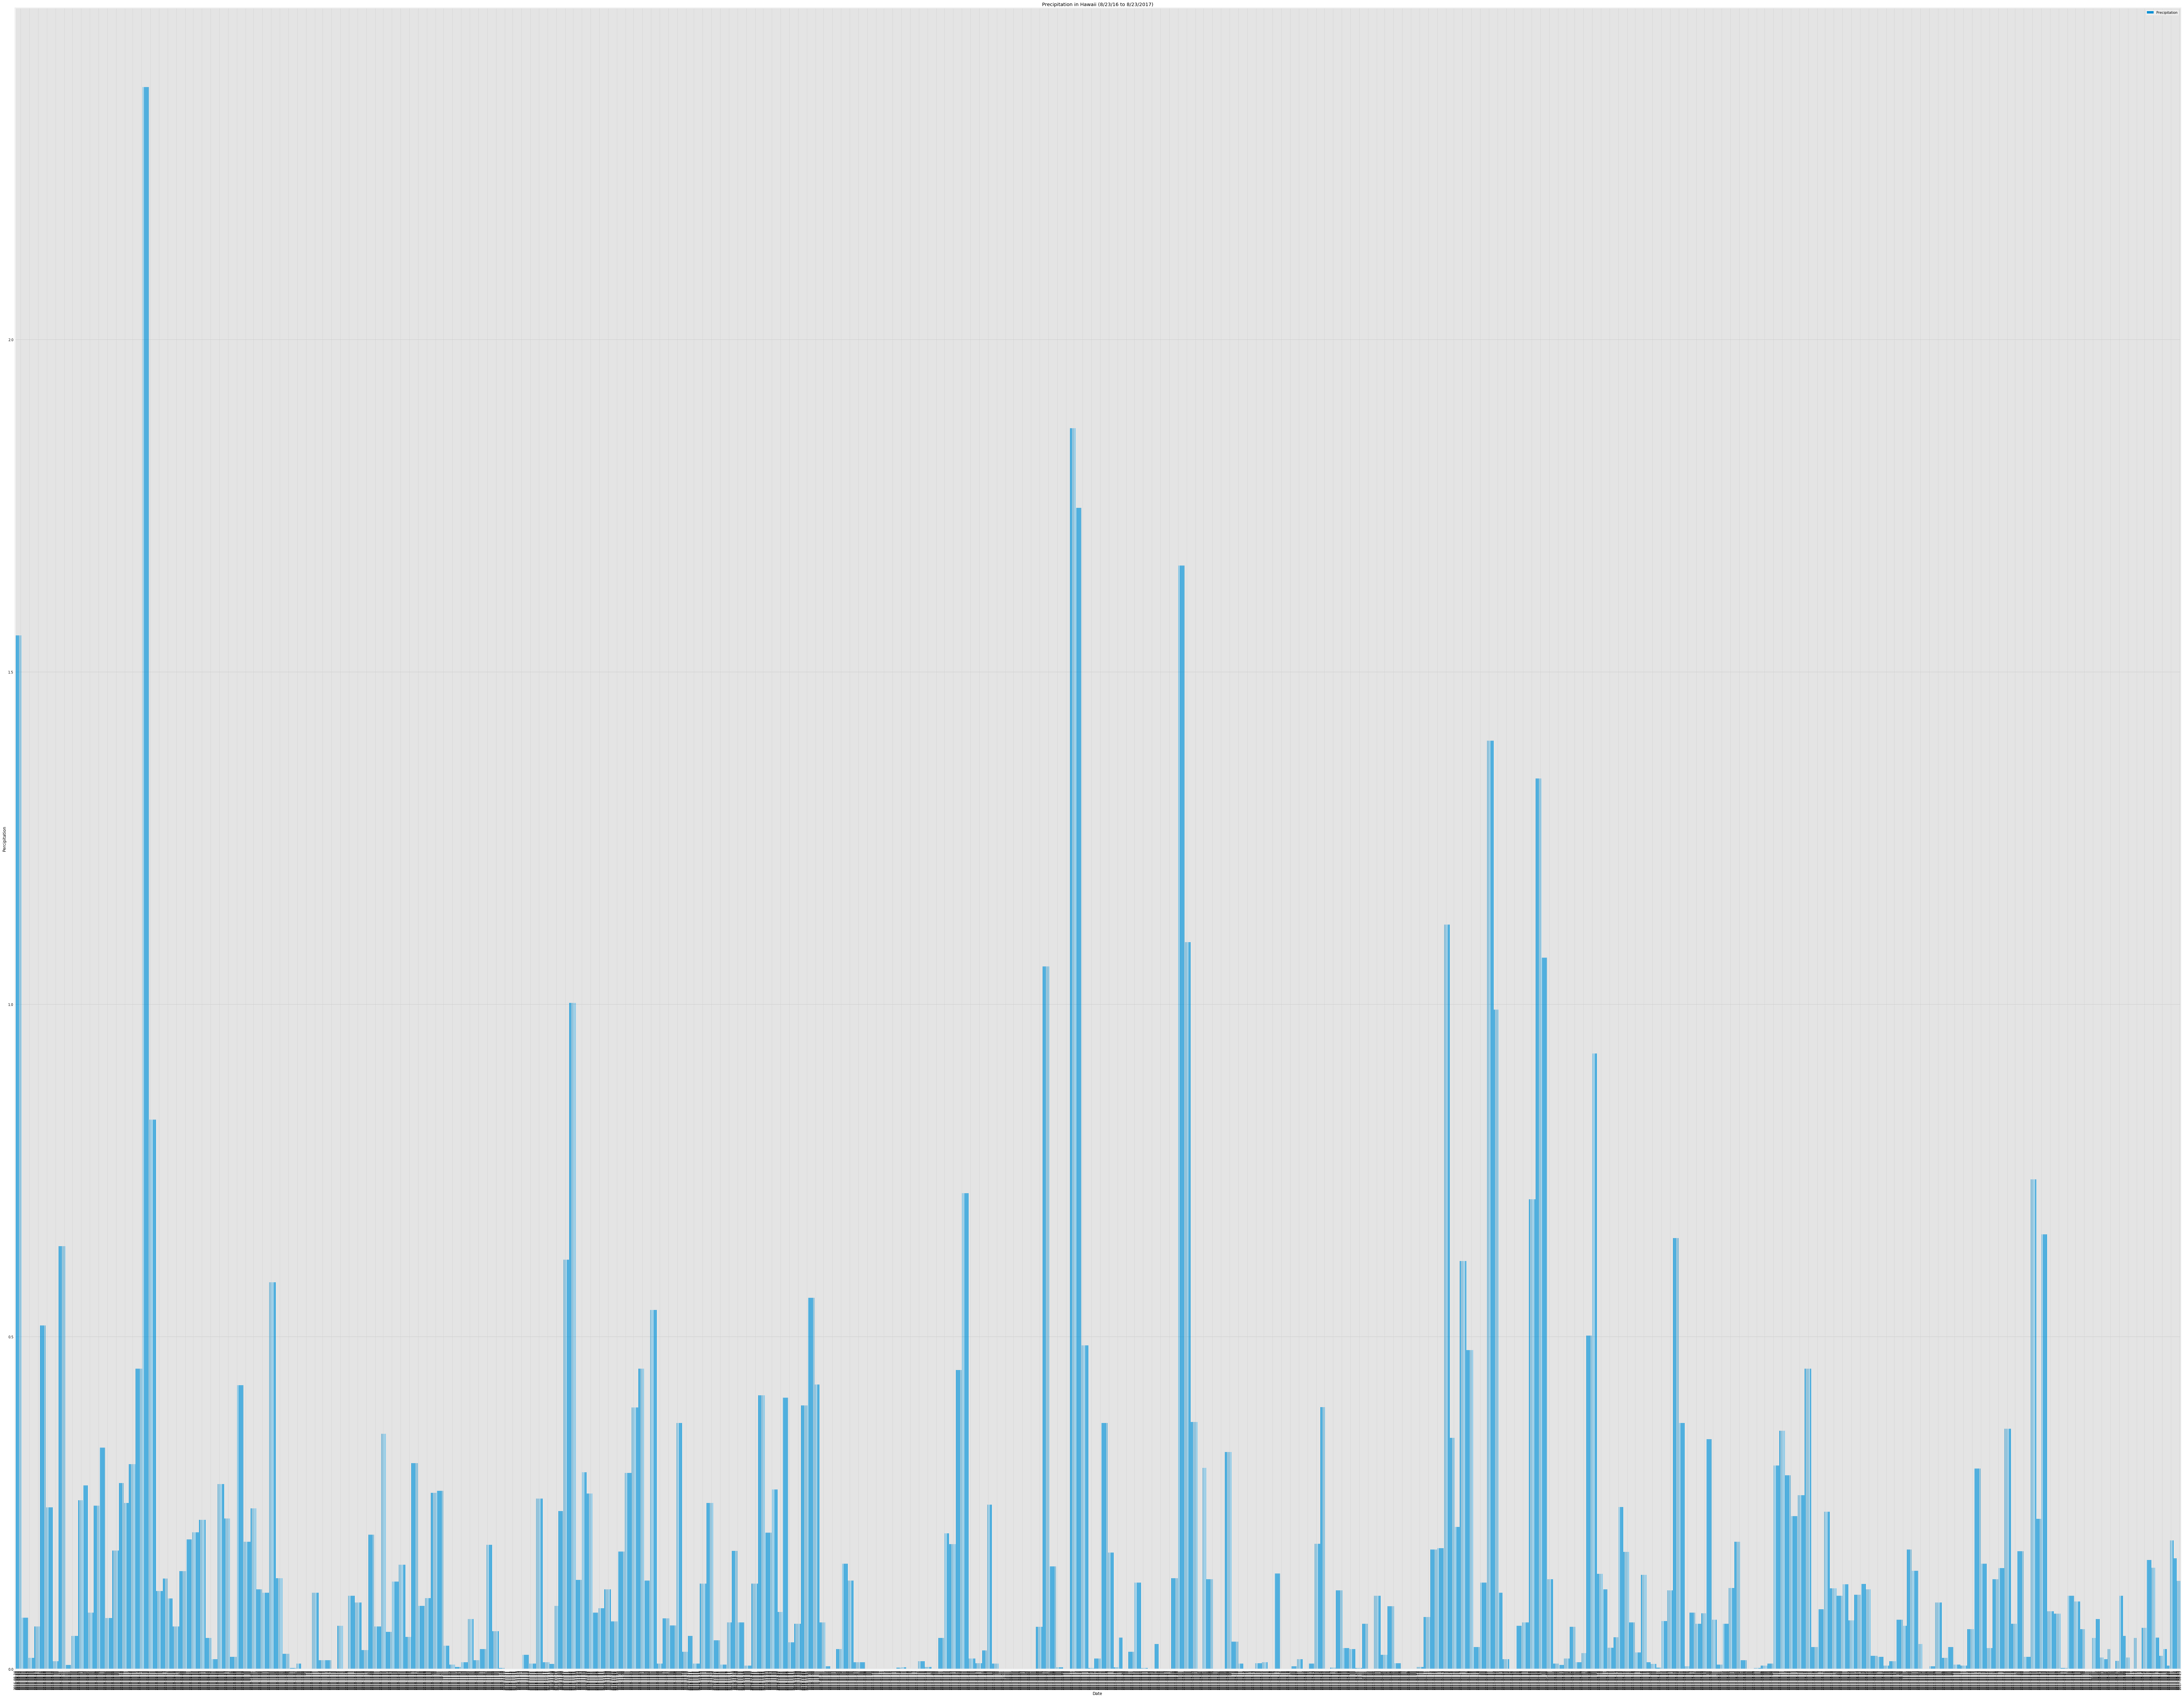

In [101]:
# Calculate first date in 12 month range
start = dt.date(2017, 8, 23)
date_range = start - dt.timedelta(days=365)
print(date_range)
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_12 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > date_range).order_by(Measurement.date)
print(last_12)
# Save the query results as a Pandas DataFrame and set the index to the date column
measure_df = pd.DataFrame(last_12, columns = ['Date', 'Percipitation'])
measure_df.set_index('Date', inplace = True)
print(measure_df.head(10))
# Sort the dataframe by date
measure_df.sort_values(by=['Date'])
print(measure_df.head(25))
# Group DF to help plot look better
measure_df2 = measure_df.groupby('Date').transform('mean')
# Use Pandas Plotting with Matplotlib to plot the data
plot1 = measure_df2.plot(kind = 'bar', y = 'Percipitation', figsize = (90,70))
plt.xlabel("Date")
plt.ylabel("Percipitation")
plt.title("Precipitation in Hawaii (8/23/16 to 8/23/2017)")
plt.legend(["Precipitation"])
plt.tight_layout()
plt.show()

In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measure_df.describe()

,Percipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [38]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Measurement.station).group_by(Measurement.station).count()
station_count

9

In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [44]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
low_temp = session.query(Measurement.station, func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
high_temp = session.query(Measurement.station, func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
best_station = [low_temp, high_temp, avg_temp]
best_station

[[('USC00519281', 54.0)],
 [('USC00519281', 85.0)],
 [('USC00519281', 71.66378066378067)]]

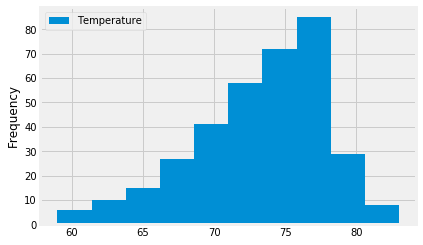

In [48]:
# Choose the station with the highest number of temperature observations. 
# Query the last 12 months of temperature observation data for this station
station_12 = session.query(Measurement.date, Measurement.station, Measurement.tobs).filter(Measurement.station =='USC00519281').filter(Measurement.date > date_range).all()
station_df = pd.DataFrame(station_12, columns = ['Date','Station','Temperature'])
station_df.set_index('Date', inplace = True)
# Plot the results as a histogram
station_df.plot(kind = 'hist')
plt.show()

In [52]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [61]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temp = calc_temps('2016-08-23', '2017-08-23')
calc_temp_df = pd.DataFrame(calc_temp, columns = ['Minimum', 'Average', 'Maximum'])
calc_temp_df

,Minimum,Average,Maximum
0,58.0,74.590583,87.0


58.0
87.0


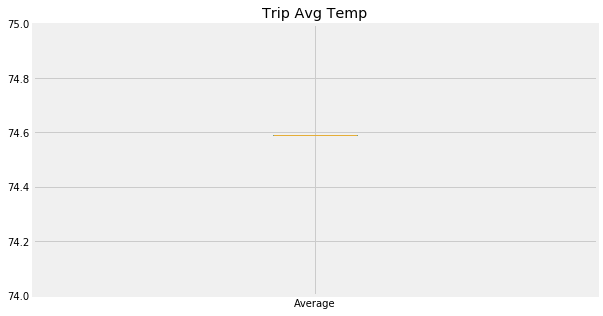

In [100]:
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
tmin = calc_temp_df.iloc[0,0]
print(tmin)
tmax = calc_temp_df.iloc[0,2]
print(tmax)
yerror = tmax-tmin
# Plot the results from your previous query as a bar chart. 
# Use the average temperature for the y value
calc_temp_df.plot(kind='box', y = 'Average', figsize=[9,5], ylim=[74,75], subplots= True, yerr = yerror, )
# Use "Trip Avg Temp" as your Title
plt.title("Trip Avg Temp")
plt.show()

In [110]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
join = session.query(Measurement.date, func.sum(Measurement.prcp), Measurement.station, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).\
join(Measurement, Measurement.station == Station.station).filter(Measurement.date>date_range).order_by(func.sum(Measurement.prcp).desc()).group_by(Measurement.station).all()
join


[('2016-08-24',
  147.11000000000004,
  'USC00516128',
  'USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('2016-08-24',
  68.24000000000002,
  'USC00519281',
  'USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 ('2016-08-24',
  48.36000000000003,
  'USC00513117',
  'USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6),
 ('2016-08-24',
  37.99,
  'USC00519523',
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('2016-08-24',
  33.19,
  'USC00514830',
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('2016-08-24',
  16.089999999999986,
  'USC00519397',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('2016-08-24',
  4.59,
  'USC00517948',
  'USC00517948',
  'PEARL CITY, HI US',
  21.3934,
  -157.9751,
  11.9)]

## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


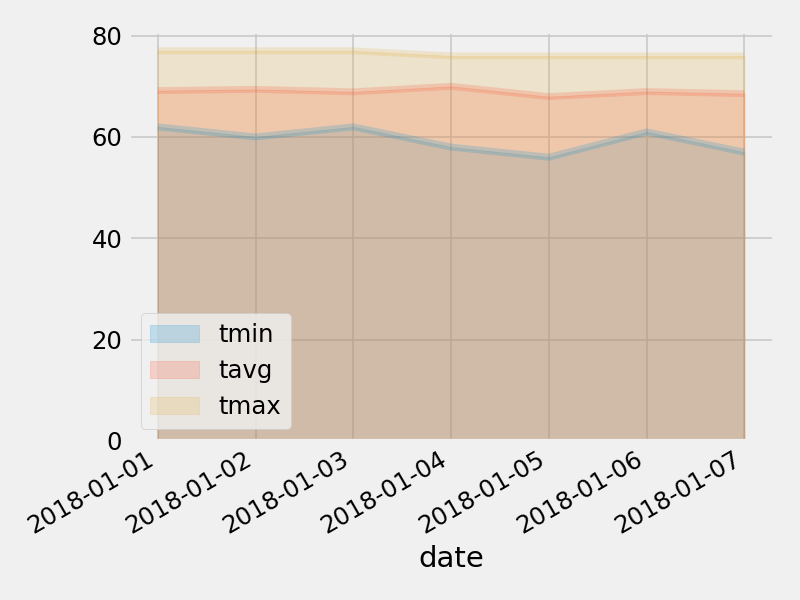

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
